<a href="https://colab.research.google.com/github/YaswanthPothineni/ECommerce_Text_Classification/blob/main/ecommerce_text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Necessary Libraries

This section imports the necessary Python libraries for data manipulation, visualization, image processing, numerical operations, and natural language processing.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import numpy as np
import nltk
import spacy

## Loading the Dataset

Load the e-commerce dataset from a CSV file into a pandas DataFrame. This dataset contains product descriptions and associated categories.

In [ ]:
data=pd.read_csv('/kaggle/input/ecommerce-text-classification/ecommerceDataset.csv')

## Initial Data Inspection

Display the first few entries of the dataset to understand the DataFrame structure. The `.head()` method is useful for getting a quick snapshot of the dataset.

In [ ]:
data.head()

,Household,"Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks, to achieve brilliant and true colours. Due to their high level of uv resistance, our prints retain their beautiful colours for many years. Add colour and style to your living space with this digitally printed painting. Some are for pleasure and some for eternal bliss.so bring home this elegant print that is lushed with rich colors that makes it nothing but sheer elegance to be to your friends and family.it would be treasured forever by whoever your lucky recipient is. Liven up your place with these intriguing paintings that are high definition hd graphic digital prints for home, office or any room."
0,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
1,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
2,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
3,Household,Incredible Gifts India Wooden Happy Birthday U...
4,Household,Pitaara Box Romantic Venice Canvas Painting 6m...


## Renaming DataFrame Columns

Rename the DataFrame columns for better clarity and to ensure that column names are consistent and descriptive of the data they represent.

In [ ]:
data.columns=['category','description']

## Initial Data Inspection

Display the first few entries of the dataset to understand the DataFrame structure. The `.head()` method is useful for getting a quick snapshot of the dataset.

In [ ]:
data.head()

,category,description
0,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
1,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
2,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
3,Household,Incredible Gifts India Wooden Happy Birthday U...
4,Household,Pitaara Box Romantic Venice Canvas Painting 6m...


## Exploring Unique Categories

Identify all unique product categories to understand the breadth of classification and to ensure that the dataset includes a diverse set of e-commerce products.

In [ ]:
data['category'].unique()

array(['Household', 'Books', 'Clothing & Accessories', 'Electronics'],
      dtype=object)

In [ ]:
data['category'].value_counts()

category
Household                 19312
Books                     11820
Electronics               10621
Clothing & Accessories     8671
Name: count, dtype: int64

## Visualizing Category Distribution

Visualize the distribution of product categories using a count plot and pie chart. This helps in understanding the balance of classes in the dataset.

<Axes: xlabel='category', ylabel='count'>

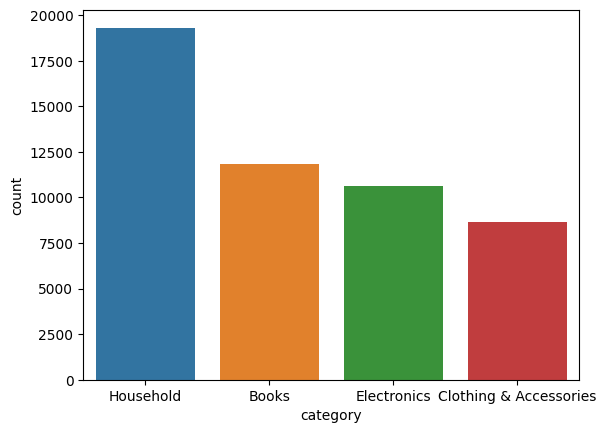

In [ ]:
sns.countplot(data=data,x='category',order = data['category'].value_counts().index)

## Visualizing Category Proportions with a Pie Chart

The pie chart provides a visual representation of the relative frequencies of the product categories, which is helpful to quickly ascertain the distribution of data.

<Axes: ylabel='count'>

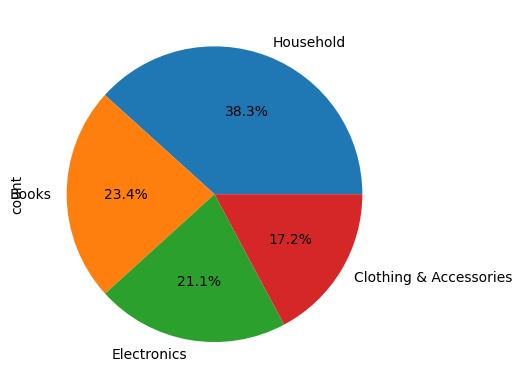

In [ ]:
data['category'].value_counts().plot.pie(autopct='%1.1f%%')

## Handling Missing Data

Check for any missing values in the dataset and handle them accordingly. In this case, rows with missing values are dropped to maintain data integrity.

In [ ]:
data.isnull().sum()

category       0
description    1
dtype: int64

## Dropping Redundant Columns

After encoding the categories, drop the original `category` column from the DataFrame. This helps reduce redundancy and prepare the dataset for the machine learning pipeline.

In [ ]:
data.dropna(inplace=True)
data.isnull().sum()

category       0
description    0
dtype: int64

## Generating a Word Cloud

Create a word cloud from the product descriptions to visualize the most common words. This can give insight into the frequent terms used in e-commerce product listings.

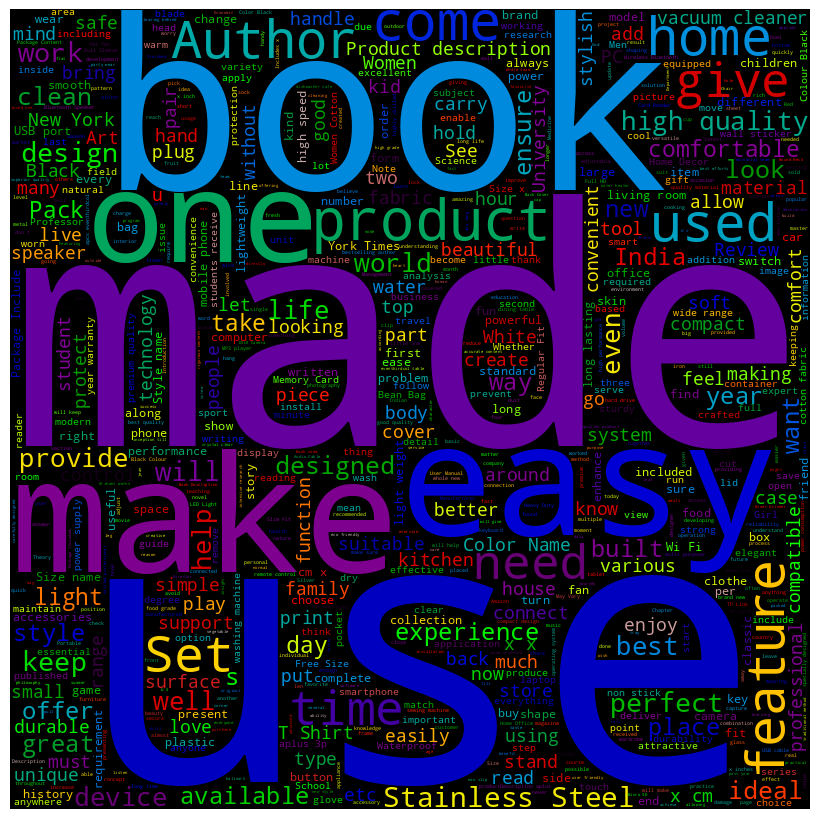

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Assuming 'data' is a pandas DataFrame with a column 'description' that contains text.
all_text = data['description'].str.cat(sep=' ')

# Set up the word cloud with some stopwords and the chosen parameters
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width=800, height=800, max_words=1000, background_color='black', colormap="nipy_spectral", stopwords=stopwords).generate(all_text)

# Plot the word cloud
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')  # 'bilinear' interpolation is just a method to make the displayed image appear smoother.
plt.axis("off")  # Turn off the axis
plt.tight_layout(pad=0)  # Remove padding

plt.show()


## Encoding Product Categories

Convert the categorical labels into numerical form using Label Encoding. This transformation is required for fitting machine learning models, which typically require numerical input.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder=LabelEncoder()

In [ ]:
data['label']=label_encoder.fit_transform(data['category'])

In [ ]:
data.head()

,category,description,label
0,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",3
1,Household,SAF 'UV Textured Modern Art Print Framed' Pain...,3
2,Household,"SAF Flower Print Framed Painting (Synthetic, 1...",3
3,Household,Incredible Gifts India Wooden Happy Birthday U...,3
4,Household,Pitaara Box Romantic Venice Canvas Painting 6m...,3


In [ ]:
data[['category','label']].value_counts()

category                label
Household               3        19312
Books                   0        11820
Electronics             2        10621
Clothing & Accessories  1         8670
Name: count, dtype: int64

Books------->0

Clothing & Accessories------->1

Electronics------->2

Household------->3


In [ ]:
data=data.drop('category',axis=1)

In [ ]:
data.head()

,description,label
0,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",3
1,SAF 'UV Textured Modern Art Print Framed' Pain...,3
2,"SAF Flower Print Framed Painting (Synthetic, 1...",3
3,Incredible Gifts India Wooden Happy Birthday U...,3
4,Pitaara Box Romantic Venice Canvas Painting 6m...,3


In [ ]:
print(data['description'][10])
print(len(data['description'][10]))

Paper Plane Design Starry Night Vangoh Wall Art Canvas Painting. Large Size Rolled Canvas Art Print (36" X 48") We use only the most modern and efficient printing technology on our canvases, with only the best and original inks and precision Epson< Roland and HP printers. This innovative HD printing technique results in durable and spectacular looking prints of the highest quality that last a lifetime. We print solely with top-notch inks, to achieve brilliant and true colours. Due to their high level of UV Resistance, our Canvas prints retain their beautiful colours for many years. Our canvases contain high levels of white, to ensure that the colours of your original image are reproduced exactly, with brilliant tones. Add colour and style to your living space with this digitally printed canvas painting. Some gifts are for pleasure and some for eternal bliss.So bring home this elegant Canvas print that is lushed with Rich colors that makes it nothing but sheer elegance to be gifted to y

## Text Data Cleaning Demonstration

Show the original and cleaned version of a specific product description to illustrate the effectiveness of the text cleaning process. Also, display the length of the description before and after cleaning to observe the impact of this step.

In [ ]:
import re
from nltk.corpus import stopwords
def clean_text(text):
    # Remove URL addresses
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    # Remove punctuation
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
    # Remove irrelevant characters
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Remove irrelevant characters
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words=text.split()
    filtered=[word for word in words if word.lower() not in stop_words]
    text=' '.join(filtered)
    return text

In [ ]:
data['description']=data['description'].apply(lambda x:clean_text(x))

In [ ]:
print(data['description'][10])
print(len(data['description'][10]))

Paper Plane Design Starry Night Vangoh Wall Art Canvas Painting Large Size Rolled Canvas Art Print X use modern efficient printing technology canvases best original inks precision Epson Roland HP printers innovative HD printing technique results durable spectacular looking prints highest quality last lifetime print solely top notch inks achieve brilliant true colours Due high level UV Resistance Canvas prints retain beautiful colours many years canvases contain high levels white ensure colours original image reproduced exactly brilliant tones Add colour style living space digitally printed canvas painting gifts pleasure eternal bliss bring home elegant Canvas print lushed Rich colors makes nothing sheer elegance gifted friends family would treasured forever whoever lucky recipient Liven place intriguing paintings canvas high definition hd graphic digital prints home office room perfect size inches x inches suits every size space great match every architectural setting prove raw canvas 

In [ ]:
data.head()

,description,label
0,SAF Floral Framed Painting Wood inch x inch Sp...,3
1,SAF UV Textured Modern Art Print Framed Painti...,3
2,SAF Flower Print Framed Painting Synthetic inc...,3
3,Incredible Gifts India Wooden Happy Birthday U...,3
4,Pitaara Box Romantic Venice Canvas Painting mm...,3


## Text Vectorization using TF-IDF

Convert the cleaned text data into a numerical format using TF-IDF vectorization. This process transforms text into a sparse matrix of term frequencies scaled by inverse document frequency.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
text_data=data["description"]
# Instantiate a TfidfVectorizer object
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the documents
tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)

In [ ]:
label_data=data["label"]

## Splitting the Dataset

Divide the dataset into training and testing sets to prepare for the machine learning model training. This step is crucial to evaluate the model performance on unseen data.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(tfidf_matrix, label_data, test_size=0.2, random_state=42)

## Training a Multinomial Naive Bayes Classifier

Train a Naive Bayes classifier using the multinomial variant suitable for discrete features like word counts for text classification.

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, Y_train)

MultinomialNB()

## Evaluating Model Performance

Calculate the accuracy of the model on the test set to evaluate its performance. Accuracy is the proportion of correct predictions over all predictions made.

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
pred=model.predict(X_test)
accuracy = accuracy_score(Y_test, pred)
print("Accuracy:", accuracy)

Accuracy: 0.945166088249876


## Detailed Classification Report

The classification report provides key metrics such as precision, recall, and F1-score for each class, which are more detailed indicators of model performance than accuracy.

In [ ]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95      2335
           1       0.98      0.95      0.96      1759
           2       0.96      0.90      0.93      2112
           3       0.91      0.98      0.94      3879

    accuracy                           0.95     10085
   macro avg       0.96      0.94      0.95     10085
weighted avg       0.95      0.95      0.95     10085



In [ ]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


## Training a Multinomial XGBoost Classifier

Train a XGBoost Classifier for text classification.

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, Y_train)

xgb_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(Y_test, xgb_pred)
print("XGBoost Accuracy:", xgb_accuracy)
print(classification_report(Y_test, xgb_pred))


XGBoost Accuracy: 0.9589489340604859
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2335
           1       0.97      0.97      0.97      1759
           2       0.98      0.93      0.95      2112
           3       0.95      0.97      0.96      3879

    accuracy                           0.96     10085
   macro avg       0.96      0.96      0.96     10085
weighted avg       0.96      0.96      0.96     10085



## Training a Multinomial RandomForestClassifier

Train a RandomForestClassifier for text classification.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, Y_train)

rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(Y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)


Random Forest Accuracy: 0.9728309370352007


## Training a Multinomial KNearestNeighbors

Train a KNearestNeighbors for text classification.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, Y_train)

knn_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(Y_test, knn_pred)
print("KNN Accuracy:", knn_accuracy)


KNN Accuracy: 0.9563708477937531
